In [62]:
import pandas as pd 
import numpy as np
import sys

import matplotlib
%matplotlib inline
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

import warnings
warnings.filterwarnings("ignore")

import sklearn

from imblearn.over_sampling import SMOTE

Loading BokehJS ...

In [2]:
insuranceClaims = pd.read_csv("/media/arun/New Volume/Practice/Bharti AXA/insurance_claims.csv")

In [65]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlob: {}'.format(matplotlib.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
Numpy: 1.15.4
Pandas: 0.23.4
Matplotlob: 2.2.3
Sklearn: 0.21.2
Seaborn: 0.9.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [4]:
insuranceClaims.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
insuranceClaims.columns, insuranceClaims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

(Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
        'policy_state', 'policy_csl', 'policy_deductable',
        'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
        'insured_education_level', 'insured_occupation', 'insured_hobbies',
        'insured_relationship', 'capital-gains', 'capital-loss',
        'incident_date', 'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city',
        'incident_location', 'incident_hour_of_the_day',
        'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
        'witnesses', 'police_report_available', 'total_claim_amount',
        'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
        'auto_model', 'auto_year', 'fraud_reported'],
       dtype='object'), None)

Text(0.5,1,'Average Amounts claimed each year over 2 Decades')

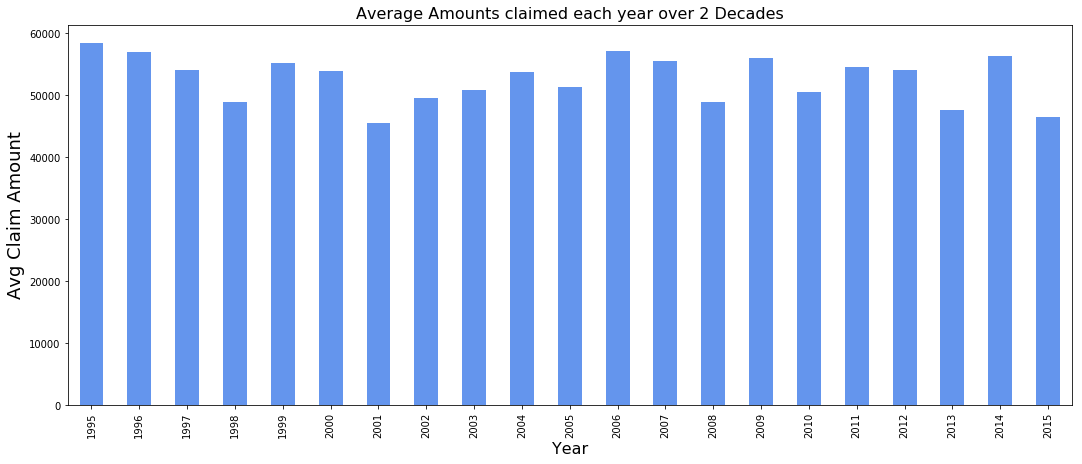

In [6]:
insuranceClaims.groupby('auto_year')['total_claim_amount'].agg(np.mean).plot(kind = 'bar',color='cornflowerblue', figsize=(18,7))
plt.ylabel('Avg Claim Amount', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.title('Average Amounts claimed each year over 2 Decades', fontsize=16)

Text(0.5,1,'Total count for each Car OEM for Insurance Claims')

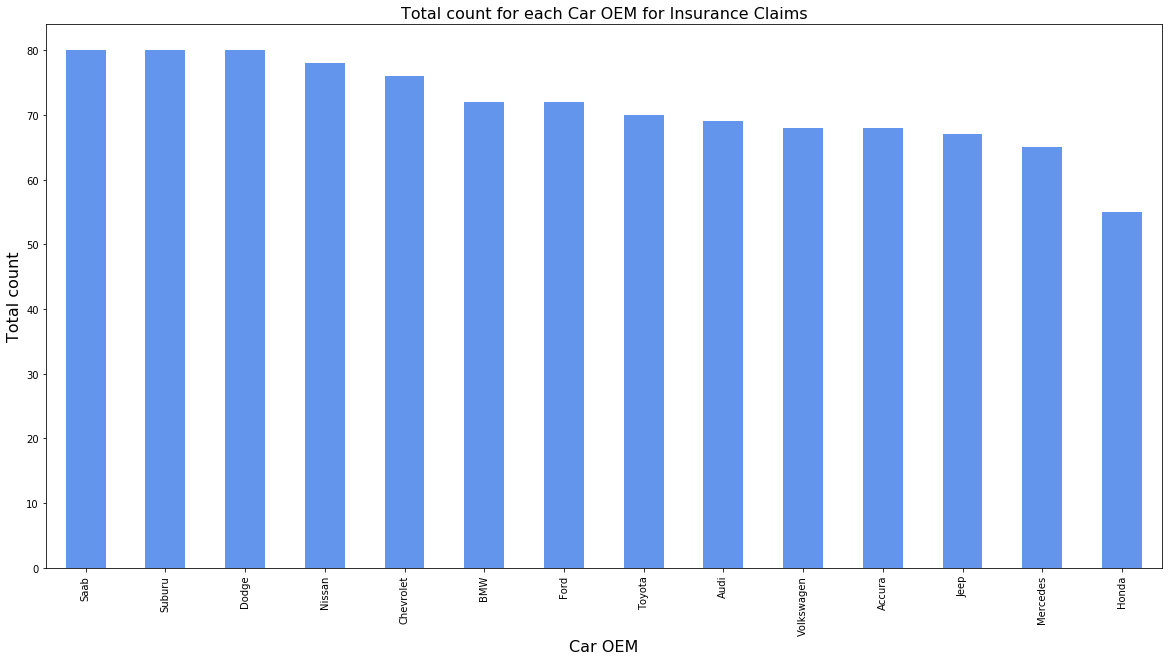

In [7]:
insuranceClaims['auto_make'].value_counts().plot.bar( color='cornflowerblue', figsize=(20,10))
plt.ylabel('Total count',fontsize=16)
plt.xlabel('Car OEM',fontsize=16)
plt.title('Total count for each Car OEM for Insurance Claims', fontsize=16)

# We can infer the count of each Model for Make and the average claimed amount using pivot

In [8]:
pivot_df = pd.pivot_table(insuranceClaims[['auto_make','auto_model','total_claim_amount']],index=['auto_make','auto_model'],values = ['total_claim_amount','auto_model'],
          aggfunc={'total_claim_amount': np.mean,'auto_model':len}, fill_value=0)
pivot_df

auto_model  total_claim_amount
auto_make  auto_model                                    
Accura     MDX                     36        48015.000000
           RSX                     12        60902.500000
           TL                      20        55595.500000
Audi       A3                      37        56584.324324
           A5                      32        51839.375000
BMW        3 Series                18        52523.333333
           M5                      15        49823.333333
           X5                      23        55161.739130
           X6                      16        66480.625000
Chevrolet  Malibu                  30        49640.000000
           Silverado               22        53975.000000
           Tahoe                   24        55503.750000
Dodge      Neon                    37        54809.459459
           RAM                     43        56920.930233
Ford       Escape                  24        63865.000000
           F150                    27        49259.259259
           Fusion                  21        57632.857143
Honda      Accord                  13        49103.846154
           CRV                     20        56960.500000
           Civic                   22        48489.090909
Jeep       Grand Cherokee          25        47953.200000
           Wrangler                42        53784.761905
Mercedes   C300                    18        61640.000000
           E400                    27        40880.000000
           ML350                   20        59545.500000
Nissan     Maxima                  24        53087.500000
           Pathfinder              31        51741.290323
           Ultima                  23        49671.739130
Saab       92x                     28        54456.071429
           93                      25        50717.200000
           95                      27        48997.407407
Suburu     Forrestor               28        59542.500000
           Impreza                 20        48816.500000
           Legacy                  32        51715.312500
Toyota     Camry                   28        41122.500000
           Corolla                 20        46564.000000
           Highlander              22        53361.363636
Volkswagen Jetta                   35        51445.714286
           Passat                  33        50228.181818

In [9]:
insuranceClaims['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [10]:
insuranceClaims['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

Text(0.5,1,'Count for Isurance Claims in each City')

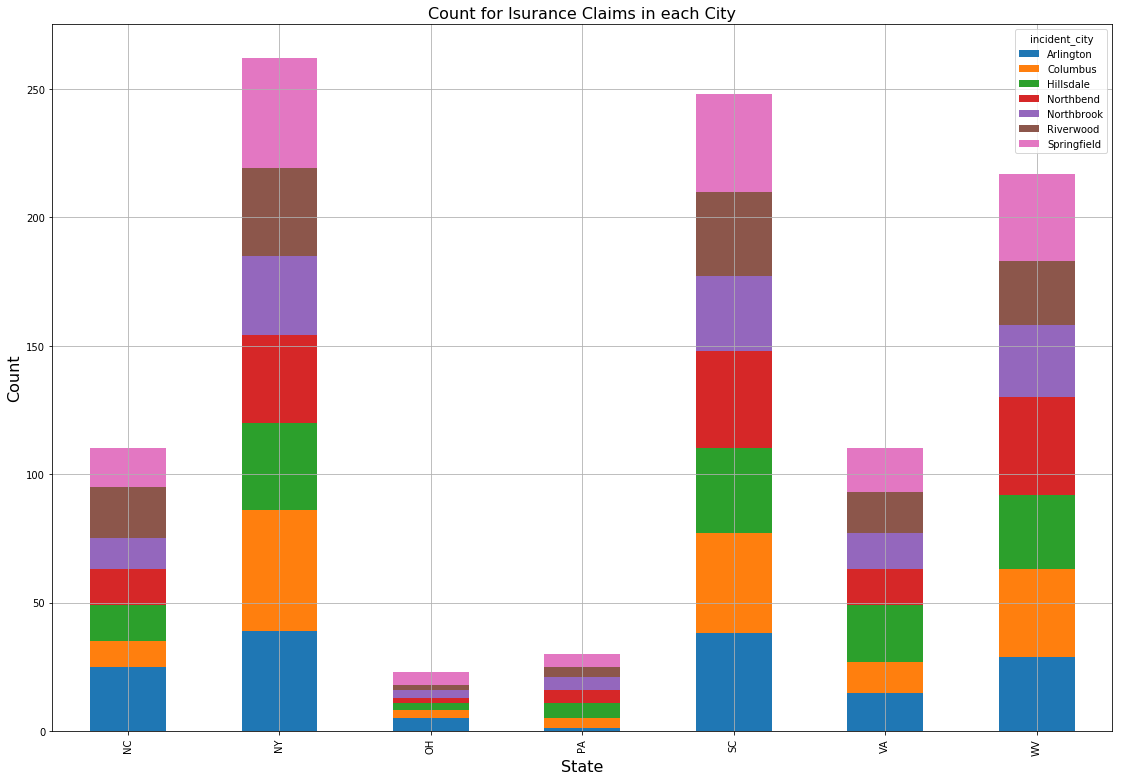

In [11]:
var = insuranceClaims.groupby(['incident_state','incident_city']).incident_city.count()
var.unstack().plot(kind='bar', stacked=True, grid=True, figsize=(19,13))
plt.ylabel('Count',fontsize=16)
plt.xlabel('State',fontsize=16)
plt.title('Count for Isurance Claims in each City', fontsize=16)

In [12]:
melted_df = pd.melt(insuranceClaims, id_vars=['auto_make'], value_vars=['bodily_injuries','number_of_vehicles_involved'])
melted_df.tail()
melted = figure()
melted.line(melted_df, label="Make", values="value", group="variable", legend="top_left", y_label="Values")
show(melted)

TypeError: line() missing 1 required positional argument: 'y'

In [13]:
insuranceClaims['fraud_reported'] = insuranceClaims['fraud_reported'].astype(str)
insuranceClaims['converted_fraudreported'] = insuranceClaims.fraud_reported.str.replace("Y","1").str.replace("N","0")

In [14]:
insuranceClaims['converted_fraudreported'] = insuranceClaims['converted_fraudreported'].astype(int)

In [15]:
insuranceClaims['age'].min(), insuranceClaims['age'].max()

(19, 64)

In [16]:
bins = [19,28,40,55]
labels = ['Young','Mid','Old']
insuranceClaims['Age_Group'] = pd.cut(insuranceClaims['age'], bins= bins, labels = labels)

In [17]:
categorial_features = ["Age_Group","insured_sex","insured_education_level","incident_type","incident_severity","authorities_contacted"]
def plotcounts(columns,feature):
  fig, axes = plt.subplots(1,3, figsize=(21,7))
  
  #Distribution of all the datapoints 
  g = sns.countplot(x=feature,data=columns,ax=axes[0]);
    
  sns.countplot(x=feature,hue='fraud_reported',data=columns,ax=axes[1]);
  
  variable = columns[columns['converted_fraudreported']==1]
  sns.countplot(x=feature,hue='converted_fraudreported',data=variable,ax=axes[2]);

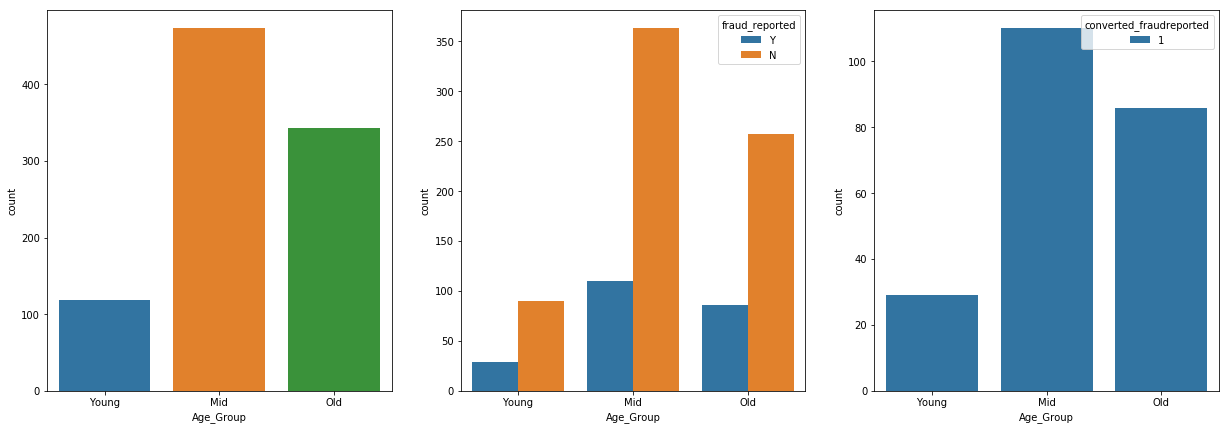

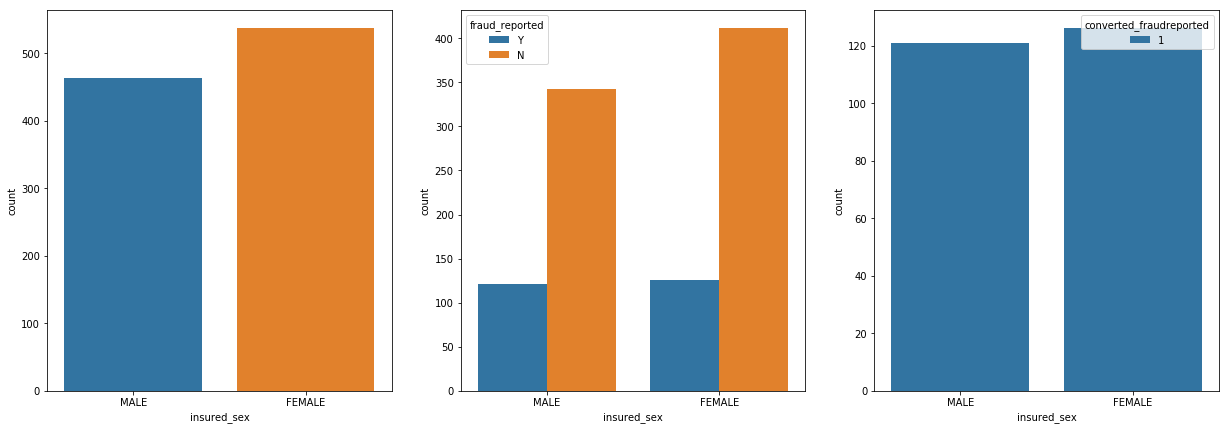

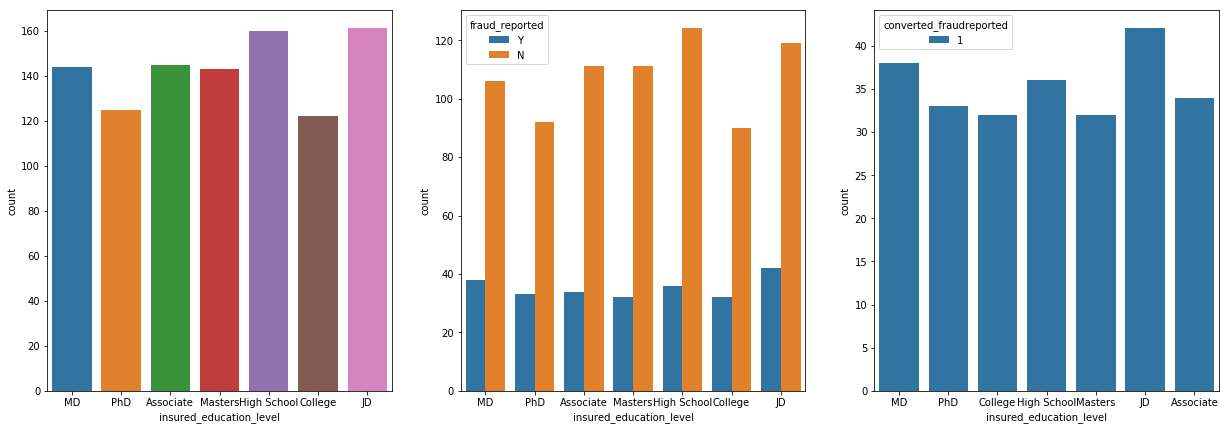

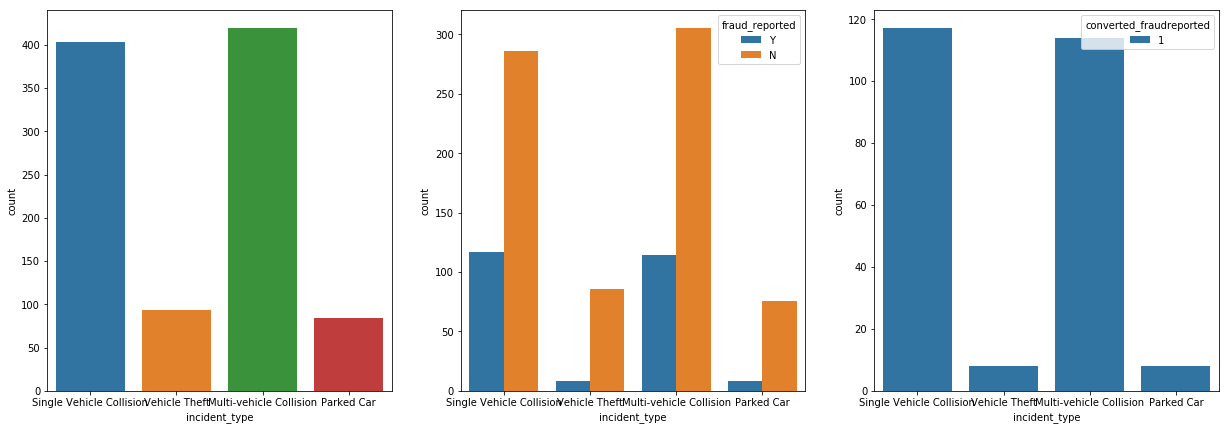

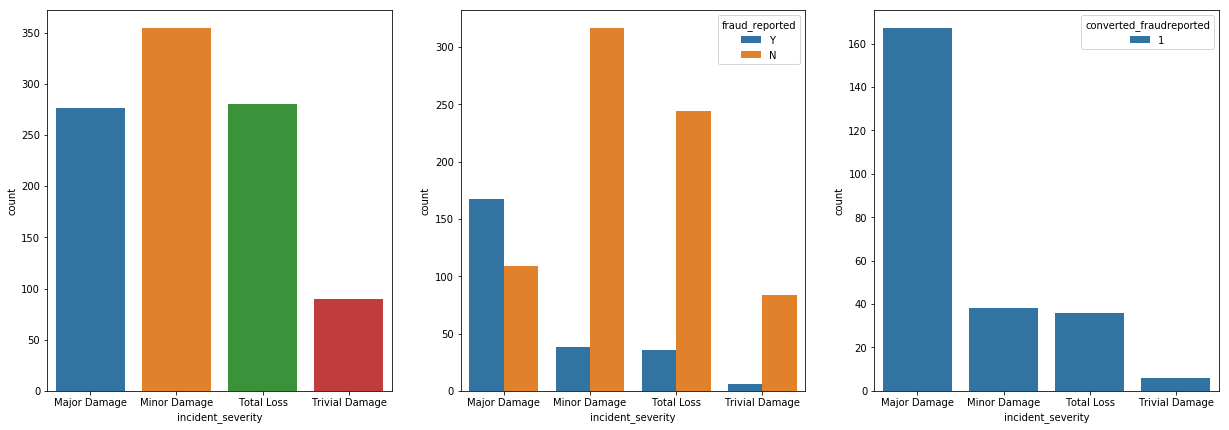

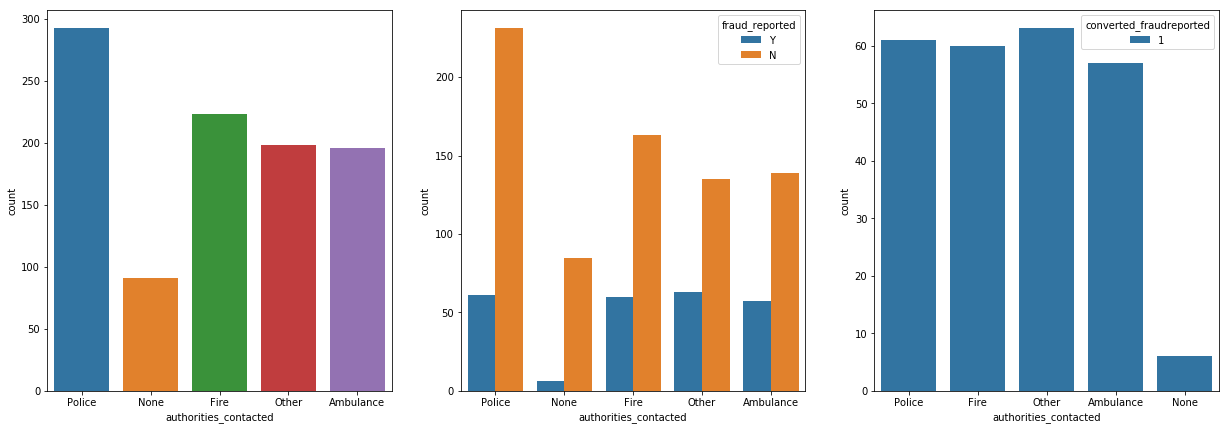

In [18]:
for feature in categorial_features:
    plotcounts(insuranceClaims,feature)

# Target class in Imbalanced as seen below

In [19]:
insuranceClaims['converted_fraudreported'].value_counts()

0    753
1    247
Name: converted_fraudreported, dtype: int64

In [20]:
insuranceClaims['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

# Selecting important features

In [21]:
train = insuranceClaims

In [22]:
train.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,converted_fraudreported,Age_Group
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,1,Old
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,1,Old
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,0,Mid
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,Old
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,0,Old


In [23]:
train = train.drop(['fraud_reported','Age_Group'],axis = 1)

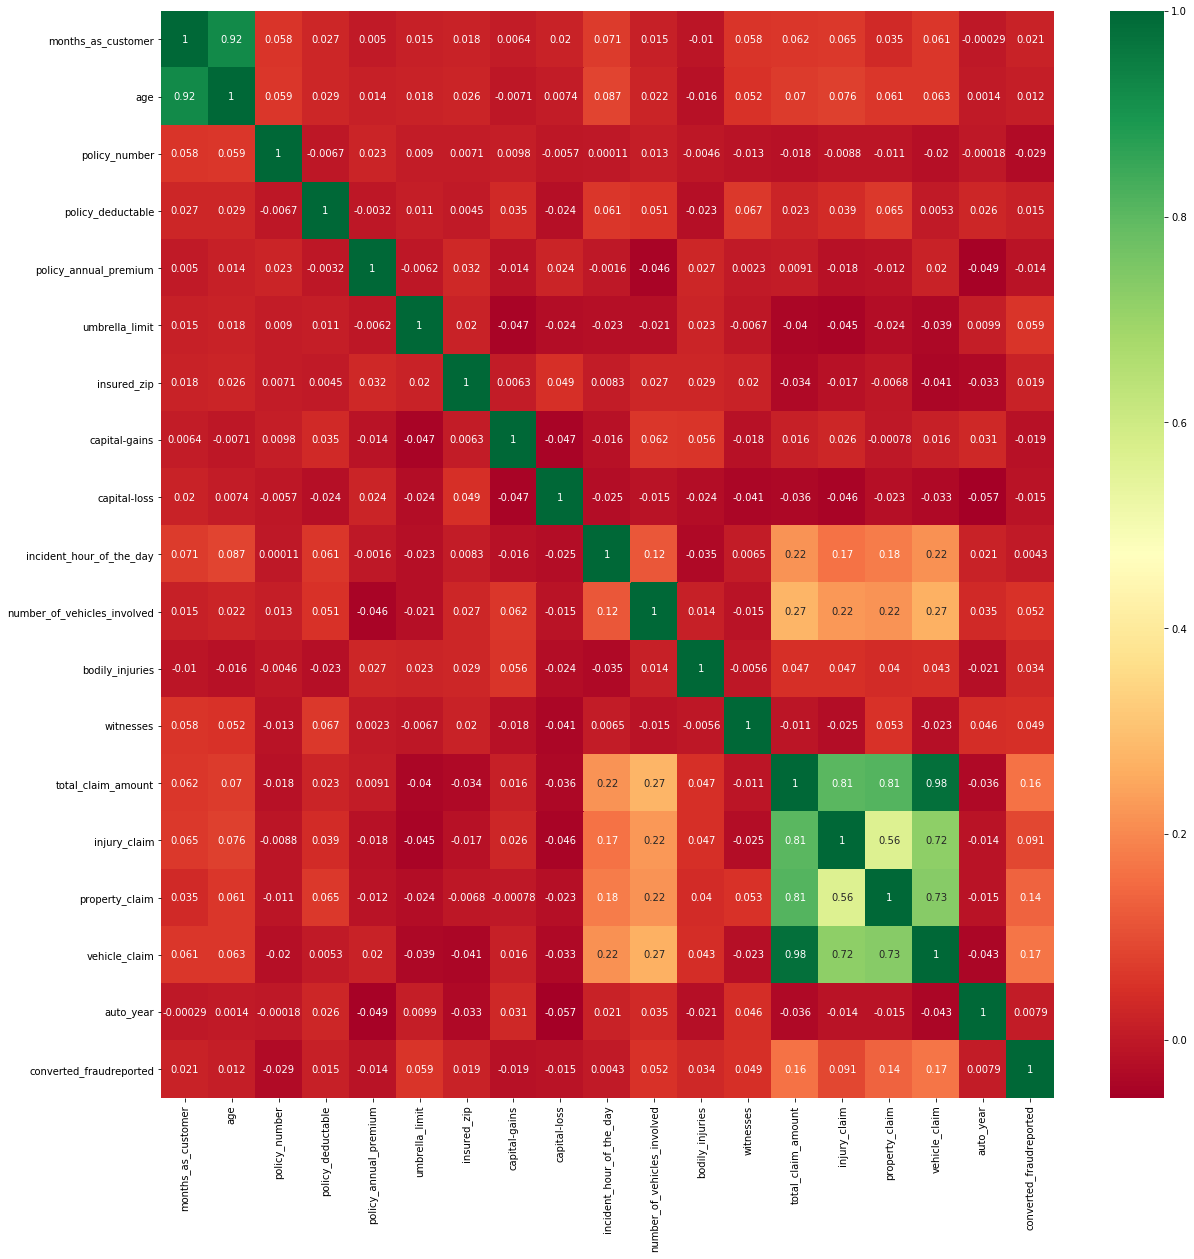

In [24]:
X = train.iloc[:,0:38]
Y = train.iloc[:,-1]
corrPlot = train.corr()
plt.figure(figsize=(20,20))
g = sns.heatmap(corrPlot, annot = True, cmap = "RdYlGn")

In [25]:
train = train.drop(['injury_claim','property_claim','vehicle_claim','age'], axis = 1)

In [26]:
train = train.drop(['policy_number','insured_zip','capital-loss','incident_date','incident_location','policy_bind_date'], axis = 1)

In [27]:
train.dtypes

months_as_customer               int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_make                

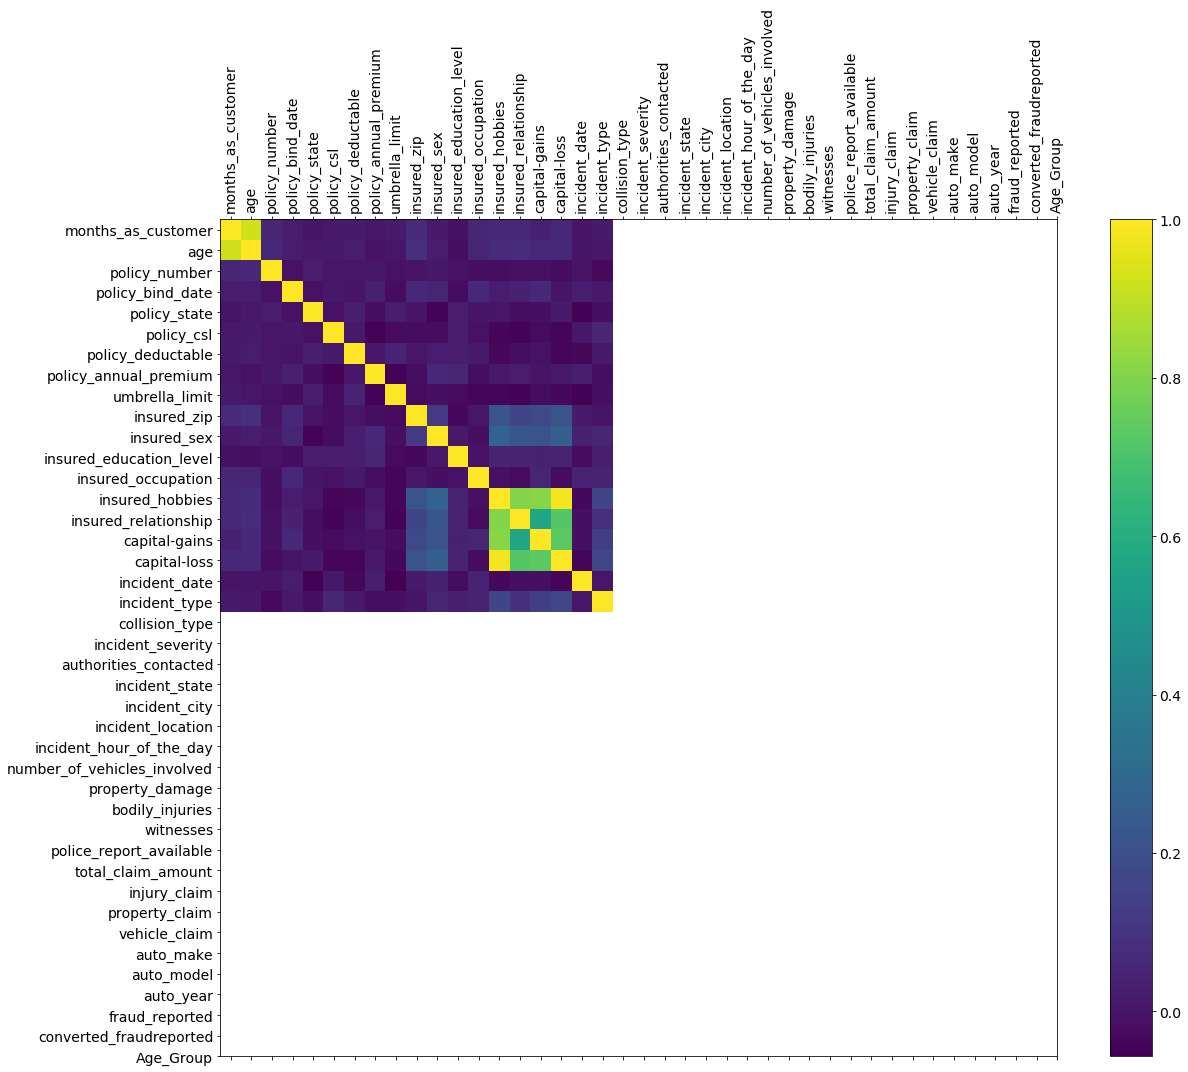

In [28]:
fig = plt.figure(figsize=(19, 15))
plt.matshow(insuranceClaims.corr(), fignum=fig.number)
plt.xticks(range(insuranceClaims.shape[1]), insuranceClaims.columns, fontsize=14, rotation=90)
plt.yticks(range(insuranceClaims.shape[1]), insuranceClaims.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [29]:
X = train.loc[:,'months_as_customer':'auto_year']

df_dummies = pd.get_dummies(X)
df_dummies.shape

(1000, 156)

In [30]:
Y = train['converted_fraudreported']

In [31]:
train_data, test_data, train_target, test_target = train_test_split(df_dummies,Y,test_size = 0.3, random_state = 42)

# Decision Tree

In [32]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
pred = clf.predict(test_data)

In [34]:
metrics.confusion_matrix(test_target,pred)

array([[191,  29],
       [ 33,  47]])

In [35]:
metrics.recall_score(test_target,pred)

0.5875

In [36]:
metrics.precision_score(test_target,pred)

0.618421052631579

In [37]:
metrics.accuracy_score(test_target,pred)

0.7933333333333333

In [51]:
metrics.f1_score(test_target,pred)

0.6025641025641025

# Smote Analysis

In [42]:
smt = SMOTE()
x_sample, y_sample = smt.fit_sample(train_data,train_target)
lr_smt = LogisticRegression(random_state=0,class_weight='balanced')
lr_smt.fit(x_sample,y_sample)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
np.bincount(y_sample)

array([533, 533])

In [48]:
y_lr_smt = lr_smt.predict(train_data)
recall_smote = recall_score(train_target,y_lr_smt)
recall_smote

0.5868263473053892

In [53]:
precision_smote = precision_score(train_target, y_lr_smt)
precision_smote

0.2978723404255319